## Olist E-Commerce Dataset 
### Checking the order dataset and cleaning it for further processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from datetime import datetime 
%matplotlib inline
df=pd.read_csv(".\olist_orders_dataset.csv")
df_seller=pd.read_csv(".\olist_sellers_dataset.csv")
df_products=pd.read_csv(".\olist_products_dataset.csv")
df_customer=pd.read_csv(".\olist_customers_dataset.csv")
df_reviews=pd.read_csv(".\olist_order_reviews_dataset.csv")
df_prodcat=pd.read_csv(".\product_category_name_translation.csv")
df_payment=pd.read_csv(".\olist_order_payments_dataset.csv")
df_items=pd.read_csv(".\olist_order_items_dataset.csv")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
# Checking for missing values.
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [4]:
df.shape

(99441, 8)

In [5]:
print('Total of unique orders: ', format(len(df_orders['order_id'].unique())))
print('Total of records: ', format(len(df_orders)))

NameError: name 'df_orders' is not defined

In [30]:
df = df.dropna(axis=0, how='any')

In [31]:
# Percent of missing values ~3%, so dropping was fine. Further it would not make too much sense to impute those values.
df.shape

(96461, 8)

In [32]:
#Checking if all missing values are dropped
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [14]:
#Splitting the timestamps into a new date column 
df['purchase_date'] = pd.to_datetime(df['order_purchase_timestamp']).dt.date
df['customer_date'] = pd.to_datetime(df['order_delivered_customer_date']).dt.date
df['estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date']).dt.date
df['approved_at'] = pd.to_datetime(df['order_approved_at']).dt.date

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_date,customer_date,estimated_delivery_date,approved_at
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-02,2017-10-10,2017-10-18,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-24,2018-08-07,2018-08-13,2018-07-26
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-08,2018-08-17,2018-09-04,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-18,2017-12-02,2017-12-15,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-13,2018-02-16,2018-02-26,2018-02-13


In [15]:
#Droping the timestamp columns as those are not of interest for me right now.
df_orders = df.drop(["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"], axis=1)
df_orders.head()

,order_id,customer_id,order_status,purchase_date,customer_date,estimated_delivery_date,approved_at
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-26
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,2018-02-13


In [16]:
#Checking the datatypes
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 99441 non-null  object
 1   customer_id              99441 non-null  object
 2   order_status             99441 non-null  object
 3   purchase_date            99441 non-null  object
 4   customer_date            96476 non-null  object
 5   estimated_delivery_date  99441 non-null  object
 6   approved_at              99281 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [17]:
#Changing the date columns from object to datetime (keep in mind ns= nano seconds!)
df_orders[["purchase_date", "customer_date", "estimated_delivery_date", "approved_at"]] = df[["purchase_date", "customer_date", "estimated_delivery_date", "approved_at"]].apply(pd.to_datetime)

In [18]:
df_orders["order_delay"]=df_orders["customer_date"]-df_orders["estimated_delivery_date"]  
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   order_id                 99441 non-null  object         
 1   customer_id              99441 non-null  object         
 2   order_status             99441 non-null  object         
 3   purchase_date            99441 non-null  datetime64[ns] 
 4   customer_date            96476 non-null  datetime64[ns] 
 5   estimated_delivery_date  99441 non-null  datetime64[ns] 
 6   approved_at              99281 non-null  datetime64[ns] 
 7   order_delay              96476 non-null  timedelta64[ns]
dtypes: datetime64[ns](4), object(3), timedelta64[ns](1)
memory usage: 6.1+ MB


In [19]:
df_orders.head()

,order_id,customer_id,order_status,purchase_date,customer_date,estimated_delivery_date,approved_at,order_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-10,2017-10-18,2017-10-02,-8 days
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-08-07,2018-08-13,2018-07-26,-6 days
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-17,2018-09-04,2018-08-08,-18 days
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-12-02,2017-12-15,2017-11-18,-13 days
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-16,2018-02-26,2018-02-13,-10 days


In [20]:
#Taking care of the ns format for further processing
df_orders["order_delay"] = pd.to_timedelta(df_orders["order_delay"], unit='ns').dt.days

(-60, 60)

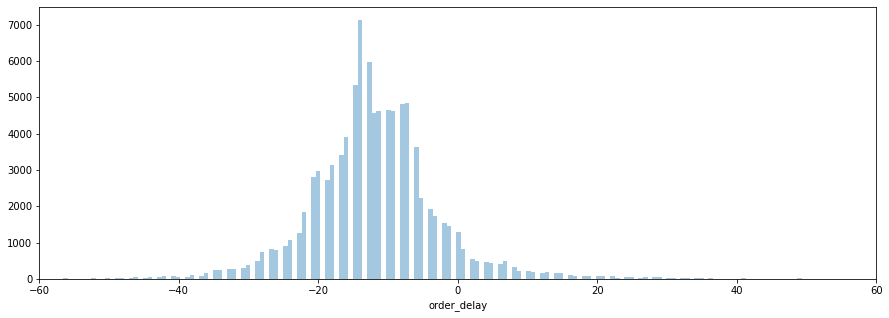

In [40]:
plt.figure(figsize=(15,5))
sns.distplot(df_orders["order_delay"], hist=True, kde=False, bins=500)
plt.xlim(-60,60)


### Seems like quite a normal distribution. Olist's estimated delivery seems to include some safety...
Let's take a look at the other datasets now:
- df_seller
- df_products
- df_customer
- df_reviews
- df_prodcat

In [41]:
df_products.head() #It's all about dimensions!

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [42]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [43]:
df_prodcat.head() #English explanation for the the category name. Let's get going.

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [44]:
df_customer.head() #Customer location. Maybe some Citys have longer delivery times than others? We will take a look if that could be improved!

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [45]:
df_seller.head() #Seller Locations: Check who is good or bad in their processing!

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [46]:
df_reviews.head() #I would need to translate that... But maybe orders that are processed/ delivered faster get higher review scores?! And how long after the delivery do people leave their rating? Check!

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [47]:
df_payment.head() #price per order

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [48]:
df_items.head() #prices per product

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


At first I'd like to dive deeper into the orders + items. Therefor I will clean up the df_items before merging those two tables for further processing.

Again: Let's check and clean our data ...

In [49]:
df_items.isnull().sum() #no missing values

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [50]:
df_items.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


In [21]:
#Checking how many unique orders are listed
print('Total of unique orders in order_items table: ', format(len(df_items['order_id'].unique())))
print('Total of unique orders in order table: ', format(len(df_orders['order_id'].unique())))
print('Total of records in order_items: ', format(len(df_items)))
print("Total of records in order table:", format(len(df_orders)))

Total of unique orders in order_items table:  98666
Total of unique orders in order table:  99441
Total of records in order_items:  112650
Total of records in order table: 99441


There are a few entries multiple times in the order_items table. Let's take a look at that:

In [24]:
# Checking duplicate entries and duplicate order lines:
print('Number of duplcated records: ', format(df_items.duplicated().sum()))
print('Number of duplcated orders: ', format(df_items[['order_id']].duplicated().sum()))
print('Number of duplcated products: ', format(df_items[['product_id']].duplicated().sum()))
print('Number of duplcated order lines: ', format(df_items[['order_id', 'product_id']].duplicated().sum()))

Number of duplcated records:  0
Number of duplcated orders:  13984
Number of duplcated products:  79699
Number of duplcated order lines:  10225


In [6]:
# Grouping by SKU and order ID:
df_items_con = df_items.groupby(by=['order_id','product_id']).agg({'order_item_id':'count', 'product_id': 'first','seller_id':'first', 'shipping_limit_date': 'first', 'price': 'first', 'freight_value': 'first'})

In [12]:
df_items_con.tail()

,,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,product_id,,,,,,
fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
fffe41c64501cc87c801fd61db3f6244,350688d9dc1e75ff97be326363655e01,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


In [11]:
df_items_con["order_item_id"].max()

20